### Collected data has uploaded to S3 and made it publicly accessible. Now going to read the data to our working directory. 

In [1]:
%mkdir ../data
!wget -O ../data/home_and_kitchen.csv - https://raw-data.s3.ap-south-1.amazonaws.com/home_and_kitchen.csv    

mkdir: cannot create directory ‘../data’: File exists
--2020-07-06 02:40:04--  http://-/
Resolving - (-)... failed: Name or service not known.
wget: unable to resolve host address ‘-’
--2020-07-06 02:40:04--  https://raw-data.s3.ap-south-1.amazonaws.com/home_and_kitchen.csv
Resolving raw-data.s3.ap-south-1.amazonaws.com (raw-data.s3.ap-south-1.amazonaws.com)... 52.219.64.99
Connecting to raw-data.s3.ap-south-1.amazonaws.com (raw-data.s3.ap-south-1.amazonaws.com)|52.219.64.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 915245469 (873M) [text/csv]
Saving to: ‘../data/home_and_kitchen.csv’

../data/home_and_ki 100%[===================>] 872.85M  8.02MB/s    in 1m 59s  

2020-07-06 02:42:04 (7.33 MB/s) - ‘../data/home_and_kitchen.csv’ saved [915245469/915245469]

FINISHED --2020-07-06 02:42:04--
Total wall clock time: 2m 0s
Downloaded: 1 files, 873M in 1m 59s (7.33 MB/s)


### Defining directory and file paths 

In [1]:
data_dir = '../data'
raw_data_file = '../data/home_and_kitchen.csv'
processed_data_file = '../data/home_and_kitchen_processed.csv'

### Importing necessary libraries for data processing

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the data with coloumns by giving columns to the data frame
# data frame = home_kitchen_data 
home_kitchen_data = None
columns=['productId', 'reviewerId', 'rating','timestamp']
home_kitchen_data = pd.read_csv(raw_data_file,names=columns)
home_kitchen_data


,productId,reviewerId,rating,timestamp
0,0006564224,A3NSN9WOX8470M,5.0,1283212800
1,0006564224,A2AMX0AJ2BUDNV,5.0,1270166400
2,0560467893,A8LUWTIPU9CZB,5.0,1446681600
3,0560467893,AABKIIHAL0L66,4.0,1446076800
4,0560467893,A3DA0KIQ5OBK5C,3.0,1441756800
5,0560467893,A32IGEYSCMEMOD,1.0,1440288000
6,0560467893,A3B6GKQQ1JJ167,3.0,1430956800
7,0560467893,A2OEROVWM53QR7,3.0,1419984000
8,0560467893,A3VKOWFHJUAAHE,5.0,1418601600
9,0560467893,A19CYDS573LII9,2.0,1417737600


In [4]:
# Data Preprocessing 
# As the timestamp is not necessary for our model we can remove the time stamp column from data frame
home_kitchen_data.drop('timestamp',axis=1,inplace=True)
home_kitchen_data.head()
# write this processed file in to a seperate csv file for future use
home_kitchen_data.to_csv(processed_data_file,index = False)

## Analyzing the Data Set.

In [6]:
# analyze shape of the data frame created
home_kitchen_data.shape

(21928568, 3)

In [5]:
# analyze data types
home_kitchen_data.dtypes

productId      object
reviewerId     object
rating        float64
dtype: object

In [6]:
# information of the data frame
home_kitchen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21928568 entries, 0 to 21928567
Data columns (total 3 columns):
productId     object
reviewerId    object
rating        float64
dtypes: float64(1), object(2)
memory usage: 501.9+ MB


In [7]:
# distribution of the most interested variable - rating 
home_kitchen_data.describe()['rating'].transpose()

count    2.192857e+07
mean     4.194894e+00
std      1.306882e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [8]:
# minimum and maximum values available for rating 
print('Minimum rating is: %d' %(home_kitchen_data.rating.min()))
print('Maximum rating is: %d' %(home_kitchen_data.rating.max()))


Minimum rating is: 1
Maximum rating is: 5


In [9]:
#Check for missing values
print('Number of missing values across columns: \n',home_kitchen_data.isnull().sum())

Number of missing values across columns: 
 productId     0
reviewerId    0
rating        0
dtype: int64


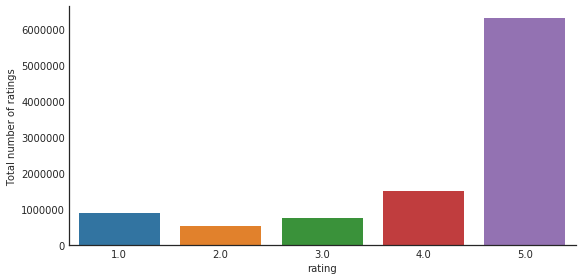

In [11]:
# obtained 10 million subset from the interested data set and 
#plotted for understanding the distribution of interested target variable.
home_kitchen_subset = home_kitchen_data.iloc[0:10000000]
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=home_kitchen_subset, aspect=2.0 , kind="count")
    g.set_ylabels("Total number of ratings")   

In [12]:
# calculate the total number of unique reviewers and unique products
import numpy as np
print("Total no of ratings :",home_kitchen_data.shape[0])
print("Total No of Unique Reviewers   :", len(np.unique(home_kitchen_data.reviewerId)))
print("Total No of Unique Products  :", len(np.unique(home_kitchen_data.productId)))

Total no of ratings : 21928568
Total No of Unique Reviewers   : 9767606
Total No of Unique Products  : 1286050


In [13]:
# number of rated products per user in desending order (most_rated_users based on the given rating) 
rated_users = pd.DataFrame(home_kitchen_data.groupby(by='reviewerId')['rating'].count())
most_rated_users = rated_users.sort_values('rating',ascending=False) 
most_rated_users.head(10)

,rating
reviewerId,
AVU1ILDDYW301,456
A1IU7S4HCK1XK0,405
A23GFTVIETX7DS,391
A2GP4EJIAA2OE0,381
A3AZI828WJN1CD,377
A1QBOC76MIOJYP,373
A2R1HUYHXV7H18,371
AT53ZTTO707MB,369
A3GF0NIB9U6VVH,357


In [14]:
# 10 most popular products based on the user ratings
popular_products = pd.DataFrame(home_kitchen_data.groupby(by='productId')['rating'].count())
most_popular_products = popular_products.sort_values('rating',ascending=False)
most_popular_products.head(10)

,rating
productId,
B00FLYWNYQ,27595
B009HVH4XO,15822
B000YGEVMI,15784
B00Q7EV29G,15698
B00EINBSJ2,15443
B00LV4W8BI,14036
B00NX47YP4,13582
B019D9HESO,12473
B0014CX87U,11414


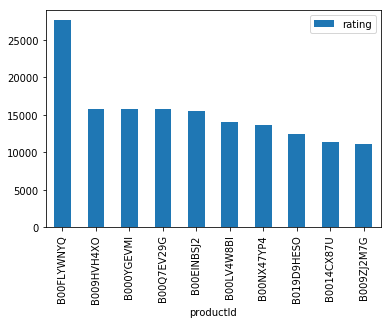

In [15]:
# visualize the 10 most popular products
most_popular_products.head(10).plot(kind = "bar")

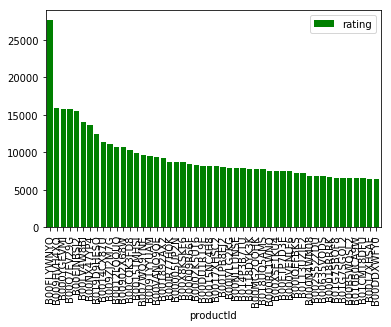

In [23]:
# visualize the 50 most popular products
most_popular_products.head(50).plot(kind = "bar",color="green",width=0.8)